In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import brewer2mpl
import colorsys
import math
import dendropy as dp
import json

from datetime import datetime
from Bio import AlignIO, SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Levenshtein import distance
from itertools import combinations, product, permutations
from time import time
from __future__ import division
from collections import Counter, defaultdict
from copy import deepcopy
from random import shuffle, choice, sample
from scipy.stats.mstats import mquantiles
from scipy.stats import norm, expon, poisson, binom
from scipy.misc import comb
from IPython.display import Math
from networkx.readwrite import json_graph 

%matplotlib inline

In [6]:
G = nx.read_gpickle('20141103 All IRD Graph with Reassortants.pkl')

reassortant_nodes = list()
for source, sink, data in G.edges(data=True):
    if data['edge_type'] == 'reassortant' and sink not in reassortant_nodes:
        reassortant_nodes.append(sink)
        
len(reassortant_nodes)

575

In [11]:
fullG = nx.read_gpickle('20141103 All IRD Parallel Transmission Graph Non-Same Subtypes Removed.pkl')
subgraphs = {i:g for i, g in enumerate(nx.connected_component_subgraphs(fullG.to_undirected()))}
len(subgraphs)

694

In [64]:
roi = 9 # reassortant of interest
def get_subgraph_idx(node, subgraphs_dictionary):
    for i, g in subgraphs_dictionary.items():
        if node in g.nodes():
            return i
        
soi = get_subgraph_idx(reassortant_nodes[roi], subgraphs) # subgraph of interest 
print(soi)

191


In [78]:
for i, node in enumerate(reassortant_nodes):
    soi = get_subgraph_idx(reassortant_nodes[i], subgraphs) # subgraph of interest 
    if soi == 3:
        print(i, node, G.node[node]['collection_date'])

(220, 'A/Quebec/144180/2009', Timestamp('2009-01-01 00:00:00'))
(233, 'A/New York/3201/2009', Timestamp('2009-01-01 00:00:00'))
(256, 'A/New York/3257/2009', Timestamp('2009-01-01 00:00:00'))


In [81]:
reassortant_nodes[220]

'A/Quebec/144180/2009'

In [80]:
soi = 3
def get_subgraph_time_range(g):
    collection_dates = set()
    
    for node, data in g.nodes(data=True):
        collection_dates.add(data['collection_date'])
        
    # collection_dates = sorted(list(collection_dates))
    
    return min(collection_dates), max(collection_dates)

print(get_subgraph_time_range(subgraphs[soi]))

def get_subgraph_subtype(g):
    subtypes = set()
    
    for node, data in g.nodes(data=True):
        subtypes.add(data['subtype'])
        
    return subtypes

print(get_subgraph_subtype(subgraphs[soi]))

print(len(subgraphs[soi].nodes()))

(Timestamp('2009-01-01 00:00:00'), Timestamp('2014-04-09 00:00:00'))
set(['H1N1'])
2783


In [83]:
# Compute time deltas to the initial isolate.
time_deltas = list()
for node in reassortant_nodes:
    idx = get_subgraph_idx(node, subgraphs)
    
    mintime = get_subgraph_time_range(subgraphs[idx])[0]
    
    collection_date = G.node[node]['collection_date']
    
    time_deltas.append(collection_date - mintime)

(array([   0.,    0.,    0.,    0.,    0.,  575.,    0.,    0.,    0.,    0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

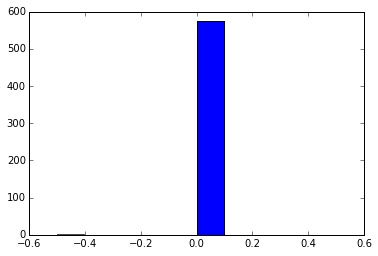

In [89]:
plt.hist([td.days for td in time_deltas])

In [88]:
Counter([td.days for td in time_deltas])

Counter({0: 575})